# Lab 4: Plotting, smoothing, transformation

** If you are not attending lab, this assignment is due 09/19/2017 at 11:59pm (graded on accuracy) **

** If you are attending lab, you do not need to submit the assignment; you just need to get checked off by your TA. **

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
sns.set()
sns.set_context("talk")
%matplotlib inline

In [2]:
# These lines load the tests.
# !pip install -U okpy

from IPython.display import display, Latex, Markdown
from client.api.notebook import Notebook
ok = Notebook('lab04.ok')

Assignment: Lab 04
OK, version v1.12.10



In [3]:
# ok.auth(force=True)
ok.auth()

Successfully logged in as kath.eddinger@berkeley.edu


## Objectives for Lab 04:

In this lab you will get some practice applying data transformations and using working with kernel density estimators.  We will be working with data from the world bank containing various statistics for countries and territories around the world.  


In [4]:
wb = pd.read_csv("data/world_bank_misc.csv", index_col=0)
wb.head()

,Primary completion rate: Male: % of relevant age group: 2015,Primary completion rate: Female: % of relevant age group: 2015,Lower secondary completion rate: Male: % of relevant age group: 2015,Lower secondary completion rate: Female: % of relevant age group: 2015,Youth literacy rate: Male: % of ages 15-24: 2005-14,Youth literacy rate: Female: % of ages 15-24: 2005-14,Adult literacy rate: Male: % ages 15 and older: 2005-14,Adult literacy rate: Female: % ages 15 and older: 2005-14,Students at lowest proficiency on PISA: Mathematics: % of 15 year-olds: 2015,Students at lowest proficiency on PISA: Reading: % of 15 year-olds: 2015,...,Access to improved sanitation facilities: % of population: 1990,Access to improved sanitation facilities: % of population: 2015,Child immunization rate: Measles: % of children ages 12-23 months: 2015,Child immunization rate: DTP3: % of children ages 12-23 months: 2015,Children with acute respiratory infection taken to health provider: % of children under age 5 with ARI: 2009-2016,Children with diarrhea who received oral rehydration and continuous feeding: % of children under age 5 with diarrhea: 2009-2016,Children sleeping under treated bed nets: % of children under age 5: 2009-2016,Children with fever receiving antimalarial drugs: % of children under age 5 with fever: 2009-2016,Tuberculosis: Treatment success rate: % of new cases: 2014,Tuberculosis: Cases detection rate: % of new estimated cases: 2015
Afghanistan,NaN,NaN,NaN,NaN,62.0,32.0,45.0,18.0,NaN,NaN,...,21.0,32.0,68.0,78.0,62.0,41.0,4.6,11.8,87.0,58.0
Albania,108.0,105.0,97.0,97.0,99.0,99.0,98.0,96.0,26.0,7.0,...,78.0,93.0,98.0,98.0,70.0,63.0,NaN,NaN,88.0,76.0
Algeria,106.0,105.0,68.0,85.0,96.0,92.0,83.0,68.0,51.0,11.0,...,80.0,88.0,95.0,95.0,66.0,42.0,NaN,NaN,88.0,80.0
American Samoa,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,61.0,63.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,87.0
Andorra,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,100.0,100.0,96.0,97.0,NaN,NaN,NaN,NaN,83.0,87.0


This table contains some interesting columns.  Take a look:

In [5]:
list(wb.columns)

['Primary completion rate: Male: % of relevant age group: 2015',
 'Primary completion rate: Female: % of relevant age group: 2015',
 'Lower secondary completion rate: Male: % of relevant age group: 2015',
 'Lower secondary completion rate: Female: % of relevant age group: 2015',
 'Youth literacy rate: Male: % of ages 15-24: 2005-14',
 'Youth literacy rate: Female: % of ages 15-24: 2005-14',
 'Adult literacy rate: Male: % ages 15 and older: 2005-14',
 'Adult literacy rate: Female: % ages 15 and older: 2005-14',
 'Students at lowest proficiency on PISA: Mathematics: % of 15 year-olds: 2015',
 'Students at lowest proficiency on PISA: Reading: % of 15 year-olds: 2015',
 'Students at lowest proficiency on PISA: Science: % of 15 year-olds: 2015',
 'Population: millions: 2016',
 'Surface area: sq. km thousands: 2016',
 'Population density: people per sq. km: 2016',
 'Gross national income, Atlas method: $ billions: 2016',
 'Gross national income per capita, Atlas method: $: 2016',
 'Purchasin

# Part 1: Scaling

In the first part of this assignment we will be scaling the data to linearize visualizations.


## Question 1:

Extract the fields corresponding to the **adult literacy rate in Female ages 15 and older for 2005-14** and the **gross national income per capita (atlas method)** into a new dataframe.  Then drop any rows that are missing values.

In [8]:
df = pd.DataFrame(index=wb.index)
df['lit'] = wb['Adult literacy rate: Female: % ages 15 and older: 2005-14']
df['inc'] = wb['Gross national income per capita, Atlas method: $: 2016']
df.dropna(inplace=True)
print("Original records:", len(wb))
print("Final records:", len(df))

Original records: 216
Final records: 147


In [9]:
_ = ok.grade('q01')
_ = ok.backup()

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Running tests

---------------------------------------------------------------------
Test summary
    Passed: 1
    Failed: 0
[ooooooooook] 100.0% passed



<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Saving notebook... Saved 'lab04.ipynb'.
Backup... 100% complete
Backup successful for user: kath.eddinger@berkeley.edu
URL: https://okpy.org/cal/ds100/fa17/lab04/backups/zpgDQ5
NOTE: this is only a backup. To submit your assignment, use:
	python3 ok --submit



## Question 2a:

Use the seaborn `distplot` tool to construct histograms for the adult literacy data and the income data:

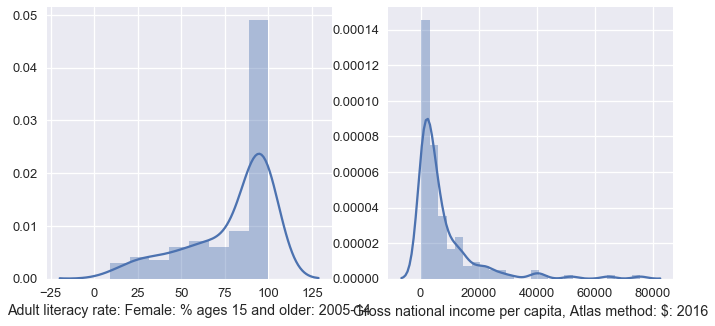

In [17]:
plt.figure(figsize=(10,5))

plt.subplot(1,2,1)
# Make plot here
sns.distplot(df['lit'])

plt.xlabel("Adult literacy rate: Female: % ages 15 and older: 2005-14")


plt.subplot(1,2,2)
# Make plot here
sns.distplot(df['inc'])

plt.xlabel('Gross national income per capita, Atlas method: $: 2016')


## Question 2b

One of the above plots could benefit from a log transformation.  Which one:

In [21]:
needs_log_transformation = 'inc'

In [22]:
_ = ok.grade('q02b')
_ = ok.backup()

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Running tests

---------------------------------------------------------------------
Test summary
    Passed: 1
    Failed: 0
[ooooooooook] 100.0% passed



<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Saving notebook... Saved 'lab04.ipynb'.
Backup... 100% complete
Backup successful for user: kath.eddinger@berkeley.edu
URL: https://okpy.org/cal/ds100/fa17/lab04/backups/Nkogj8
NOTE: this is only a backup. To submit your assignment, use:
	python3 ok --submit



## Question 2c

Remake the appropriate plot with the data transformed using `log10`. Be sure to correct the axis label:

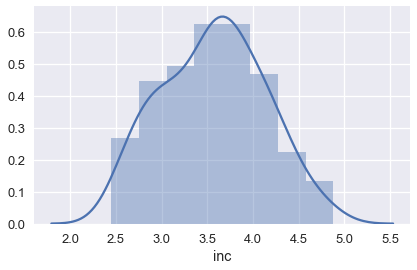

In [25]:
plt.figure()
sns.distplot(np.log10(df['inc']))

## Question 3a

Use the Seaborn `regplot` function to plot `y=inc` vs `x=lit`:

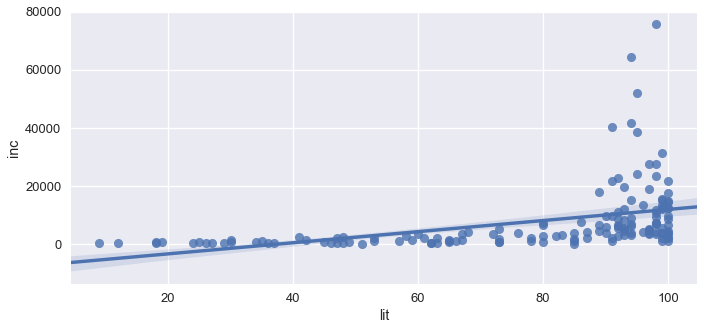

In [28]:
plt.figure(figsize=(10,5))
# Make plot here
sns.regplot(df['lit'], df['inc'])

## Question 3b 

Using the Tukey Mosteller's Bulge diagram: 

![The Bulge](https://i0.wp.com/f.hypotheses.org/wp-content/blogs.dir/253/files/2014/06/Selection_005.png?zoom=2&resize=295%2C318)

Create two new columns `trans_lit` and `trans_inc` that correct the plot:

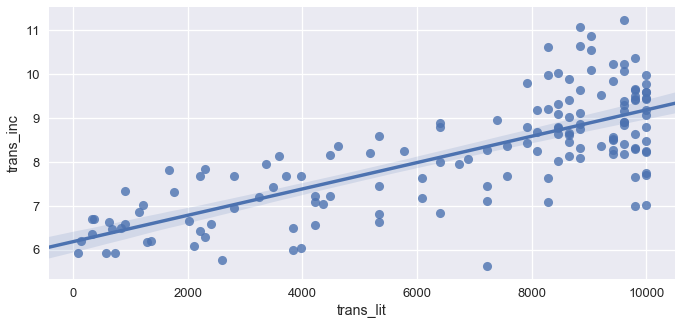

In [33]:
plt.figure(figsize=(10,5))

df['trans_lit'] = np.power((df['lit']), 2)
df['trans_inc'] = np.log(df['inc'])

sns.regplot(x='trans_lit', y='trans_inc', data=df)

In [34]:
_ = ok.grade('q03b')
_ = ok.backup()

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Running tests

---------------------------------------------------------------------
Test summary
    Passed: 1
    Failed: 0
[ooooooooook] 100.0% passed



<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Saving notebook... Saved 'lab04.ipynb'.
Backup... 100% complete
Backup successful for user: kath.eddinger@berkeley.edu
URL: https://okpy.org/cal/ds100/fa17/lab04/backups/W6ArMX
NOTE: this is only a backup. To submit your assignment, use:
	python3 ok --submit



# Part 2: Kernel Density Estimation

In this part of the lab you will implement a kernel density estimator.


Let's implement our own version of the KDE plot above.  Below we give you the Guassian Kernel function

$$\Large
K_\alpha(x, z) = \frac{1}{\sqrt{2 \pi \alpha^2}} \exp\left(-\frac{(x - z)^2}{2  \alpha ^2} \right)
$$

In [35]:
def gaussian_kernel(alpha, x, z):
    return 1.0/np.sqrt(2. * np.pi * alpha**2) * np.exp(-(x - z) ** 2 / (2.0 * alpha**2))

## Question 4a

Implement the KDE function which computes:

$$\Large
f_\lambda(x) = \frac{1}{n} \sum_{i=1}^n K_\alpha(x, z_i)
$$

Where {z_i} is the data, alpha is a parameter to control the smoothness

In [46]:
def kde(kernel, alpha, x, data):
    """
    Compute the kernel density estimate for the single query point x.

    Args:
        kernel: a kernel function from two argumen
        alpha: the smoothing parameter to pass to the kernel
        x: a single query point (in one dimension)
        data: a numpy array of data points

    Returns:
        The smooted estimate at the query point x
    """
    weights = [kernel(alpha, x, d) for d in data]

    return np.sum(weights)/len(data)
        

In [47]:
_ = ok.grade('q04a')
_ = ok.backup()

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Running tests

---------------------------------------------------------------------
Test summary
    Passed: 1
    Failed: 0
[ooooooooook] 100.0% passed



<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Saving notebook... Saved 'lab04.ipynb'.
Backup... 100% complete
Backup successful for user: kath.eddinger@berkeley.edu
URL: https://okpy.org/cal/ds100/fa17/lab04/backups/J6kgY2
NOTE: this is only a backup. To submit your assignment, use:
	python3 ok --submit



Now let's test your function to generate a plot. You may find the ```np.linspace``` function helpful when plotting the KDE curve.

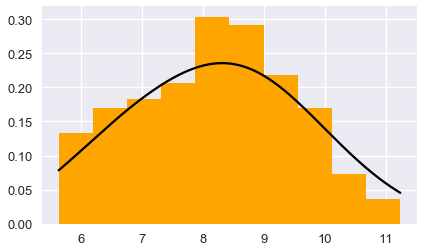

In [49]:
alpha = 1.0
xs = np.linspace(df['trans_inc'].min(), df['trans_inc'].max(), 1000)
curve = [kde(gaussian_kernel, alpha, x, df['trans_inc']) for x in xs]
plt.hist(df['trans_inc'], normed=True, color='orange')
plt.plot(xs, curve, 'k-')

## Question 4b

If we make the value of alpha much smaller what happens?  Try setting the value of alpha to a more appropriate value:

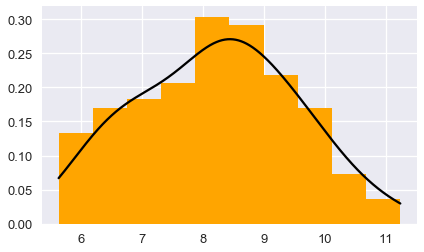

In [57]:
alpha = .6
xs = np.linspace(df['trans_inc'].min(), df['trans_inc'].max(), 1000)
curve = [kde(gaussian_kernel, alpha, x, df['trans_inc']) for x in xs]
plt.hist(df['trans_inc'], normed=True, color='orange')
plt.plot(xs, curve, 'k-')

In [58]:
_ = ok.grade('q04b')
_ = ok.backup()

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Running tests

---------------------------------------------------------------------
Test summary
    Passed: 1
    Failed: 0
[ooooooooook] 100.0% passed



<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Saving notebook... Saved 'lab04.ipynb'.
Backup... 100% complete
Backup successful for user: kath.eddinger@berkeley.edu
URL: https://okpy.org/cal/ds100/fa17/lab04/backups/OYpnGG
NOTE: this is only a backup. To submit your assignment, use:
	python3 ok --submit



## Question 4c

How is the alpha effecting the results? What if we keep using a larger alpha on the transformed data? 

In [ ]:
q4c_answer = """

"""

## Question 4d

We can also try other kernel functions such as the [boxcar kernel](https://en.wikipedia.org/wiki/Boxcar_function).


In [59]:
def boxcar_kernel(alpha, x, z):
    return (((x-z)>=-alpha/2)&((x-z)<=alpha/2))/alpha

We can plot the kernel function to see how it looks like

In [60]:
from ipywidgets import interact
x = np.linspace(-10,10,1000)
def f(alpha):
    plt.plot(x, boxcar_kernel(alpha,x,0))
    plt.plot(x, gaussian_kernel(alpha,x,0))
    plt.show()
interact(f, alpha=(1,10,0.1))

<function __main__.f>

Using the interactive plot below compare the the two kernel techniques:  (Generating the KDE plot is slow, so you may expect some latency after you move the slider)

In [61]:
xs = np.linspace(df['trans_inc'].min(), df['trans_inc'].max(), 1000)
def f(alpha_g, alpha_b):
    plt.hist(df['trans_inc'], normed=True, color='orange')
    g_curve = [kde(gaussian_kernel, alpha_g, x, df['trans_inc']) for x in xs]
    plt.plot(xs, g_curve, 'k-', label='Gaussian')
    b_curve = [kde(boxcar_kernel, alpha_b, x, df['trans_inc']) for x in xs]
    plt.plot(xs, b_curve, 'r-', label='Boxcar')
    plt.show()
interact(f, alpha_g=(0.01,.5,0.01), alpha_b=(0.01,3,0.1))

<function __main__.f>

How is the boxcar kde plot comparing to previous plot using the gaussian kernel?

In [ ]:
answer="""

"""

## Submission

Congrats! You are finished with this assignment. For convenience, we've included a cell below that runs all the OkPy tests.

In [ ]:
import os
print("Running all tests...")
_ = [ok.grade(q[:-3]) for q in os.listdir("ok_tests") if q.startswith('q')]

Now, run the cell below to submit your assignment to OkPy. The autograder should email you shortly with your autograded score. The autograder will only run once every 30 minutes.

**If you're failing tests on the autograder but pass them locally**, you should simulate the autograder by doing the following:

1. In the top menu, click Kernel -> Restart and Run all.
2. Run the cell above to run each OkPy test.

**You must make sure that you pass all the tests when running steps 1 and 2 in order.** If you are still failing autograder tests, you should double check your results.

In [ ]:
_ = ok.submit()